<a href="https://colab.research.google.com/github/maddepallisivani123/CNN/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Intrduction:** This project implements a Convolutional Neural Network (CNN) for handwritten digit recognition using the MNIST dataset. After preprocessing, we design a CNN architecture with convolutional and max-pooling layers followed by fully connected layers. We train the model on the dataset and evaluate its performance using metrics such as accuracy and loss curves. K-Fold Cross Validation is employed for robust evaluation. The project provides detailed documentation of each network component's parameters and dimensions, alongside diagrams illustrating the CNN architecture. Analysis of results includes insights into the impact of CNN components on performance and interpretation of the confusion matrix. Through this project, practical experience in CNN implementation for image classification and model evaluation is gained.

Importing Libariers

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.utils import to_categorical
from ucimlrepo import fetch_ucirepo

**1) Data Preparation**

Installing the ucimlrepo package


In [2]:
pip install ucimlrepo

Importing the dataset

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

Preprocesing

In [5]:
#Accesing the data
data = optical_recognition_of_handwritten_digits.data
# Extracting the feature and target variables
X = data.features
y = data.targets

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (Normalization and Reshaping)
X_train = X_train.astype('float32') / 16.0  # Normalization
X_test = X_test.astype('float32') / 16.0    # Normalization
X_train = X_train.values.reshape(-1, 8, 8, 1)       # Reshaping
X_test = X_test.values.reshape(-1, 8, 8, 1)         # Reshaping


In [13]:
import pandas as pd

# Reshape data to 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshaping to (number of samples, 64)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)  # Reshaping to (number of samples, 64)

# Create pandas DataFrames
train_df = pd.DataFrame(X_train_reshaped, columns=[f"Pixel_{i}" for i in range(64)])
test_df = pd.DataFrame(X_test_reshaped, columns=[f"Pixel_{i}" for i in range(64)])

# Display the first few rows of each DataFrame
print("Training Data:")
print(train_df.head())
print("\nTesting Data:")
print(test_df.head())

Training Data:
   Pixel_0  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  Pixel_7  \
0      0.0      0.0    0.000   0.0625   0.9375   0.3125      0.0      0.0   
1      0.0      0.0    0.000   0.6250   0.6250   0.0000      0.0      0.0   
2      0.0      0.0    0.000   0.6250   0.6250   0.0000      0.0      0.0   
3      0.0      0.0    0.000   0.1250   0.9375   0.3125      0.0      0.0   
4      0.0      0.0    0.125   0.6250   0.4375   0.0000      0.0      0.0   

   Pixel_8  Pixel_9  ...  Pixel_54  Pixel_55  Pixel_56  Pixel_57  Pixel_58  \
0      0.0   0.0000  ...    0.0000       0.0       0.0       0.0    0.0000   
1      0.0   0.0000  ...    0.0000       0.0       0.0       0.0    0.0000   
2      0.0   0.0000  ...    0.0000       0.0       0.0       0.0    0.0000   
3      0.0   0.0000  ...    0.0000       0.0       0.0       0.0    0.0000   
4      0.0   0.1875  ...    0.5625       0.0       0.0       0.0    0.1875   

   Pixel_59  Pixel_60  Pixel_61  Pixel_62  Pixel_63  

First few training images and their labels:


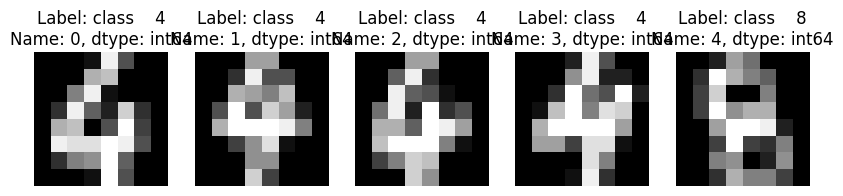

First few testing images and their labels:


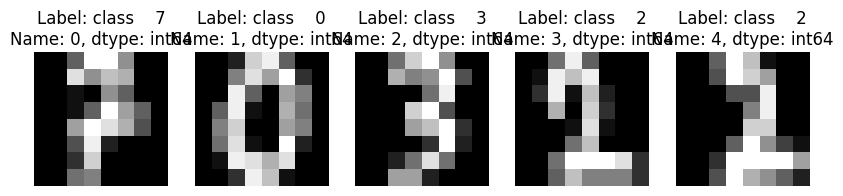

In [14]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(8, 8), cmap='gray')
        ax.set_title(f'Label: {labels.iloc[i]}')
        ax.axis('off')
    plt.show()

# Display the first few images and labels from the training and testing datasets
print("First few training images and their labels:")
display_images(X_train, y_train.reset_index(drop=True))

print("First few testing images and their labels:")
display_images(X_test, y_test.reset_index(drop=True))


Analysis:
Normalization is essential for ensuring stable training, preventing optimization issues, equalizing feature importance, regularizing the model, and improving interpretability.
By normalization, It increases the performance the model.

**2) Convolutiomnal Neural Network Architecture:**





In [29]:
# Define CNN architecture
model = Sequential()
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1), name="Conv2D_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="Conv2D_2"))
model.add(Conv2D(128, (3, 3), activation='relu', name="Conv2D_3"))
model.add(Conv2D(256, (2, 2), activation='relu', name="Conv2D_4"))

**Analysis:**

Conv2D_1:
- Number of filters: 32
- Kernel size: (3, 3)
- Activation function: ReLU
- Input shape: (8, 8, 1)
- Output shape: Depends on the number of filters and padding, but typically (6, 6, 32) with 'valid' padding.

Conv2D_2:
- Number of filters: 64
- Kernel size: (3, 3)
- Activation function: ReLU
- Output shape: Depends on the number of filters and padding, but typically (4, 4, 64) with 'valid' padding.

Conv2D_3:
- Number of filters: 128
- Kernel size: (3, 3)
- Activation function: ReLU
- Output shape: Depends on the number of filters and padding, but typically (2, 2, 128) with 'valid' padding.

Conv2D_4:
- Number of filters: 256
- Kernel size: (2, 2)
- Activation function: ReLU
- Output shape: Depends on the number of filters and padding, but typically (1, 1, 256) with 'valid' padding.

Analysis:
- The architecture consists of four convolutional layers, each followed by a ReLU activation function.
- The first convolutional layer (Conv2D_1) takes input images with a shape of (8, 8, 1) and applies 32 filters of size (3, 3).
- Subsequent layers increase the number of filters, potentially capturing more complex patterns in the data.
- The last convolutional layer (Conv2D_4) uses a smaller kernel size of (2, 2), which can help in capturing finer details in the feature maps.


**3) Max Pooling**

In [30]:
# Remove the existing max pooling layer
model.pop()

# Add the max pooling layer again with the same name
model.add(MaxPooling2D((2, 2), name="MaxPooling2D_1"))



Analysis:
 MaxPooling2D layers downsample feature maps by taking the maximum value in each region defined by pool size.
- Reduces spatial dimensions, preserving important features.


Flattern Layer


In [31]:
#flattern layer
model.add(Flatten(name="Flatten"))

**4) Fully Connected Layer and Softmax**

In [32]:
model.add(Dense(64, activation='relu', name="Dense_1"))
model.add(Dense(10, activation='softmax', name="Output"))


Analysis:Flatten layer converts the output from convolutional layers into a 1D array.
- Dense_1 layer has 64 neurons with ReLU activation.
- Output layer has 10 neurons with softmax activation for classification.

These dense layers perform classification based on the features extracted by the convolutional layers.
Each neuron in the dense layer is connected to every neuron in the previous layer.
ReLU activation functions are commonly used in the hidden dense layers to introduce non-linearity.
The output layer typically uses softmax activation for multi-class classification tasks, where each neuron represents the probability of a particular class.
In this case, the output layer has 10 neurons, corresponding to the 10 classes in the classification task.

2.2) Each layer's parameters and dimensions.

In [33]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 Conv2D_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 Conv2D_3 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 MaxPooling2D_1 (MaxPooling  (None, 1, 1, 128)         0         
 2D)                                                             
                                                                 
 Flatten (Flatten)           (None, 128)               0         
                                                                 
 Dense_1 (Dense)             (None, 64)                8256      
                                                      

In [34]:
pip install pydot graphviz

2.3) Model Architecture

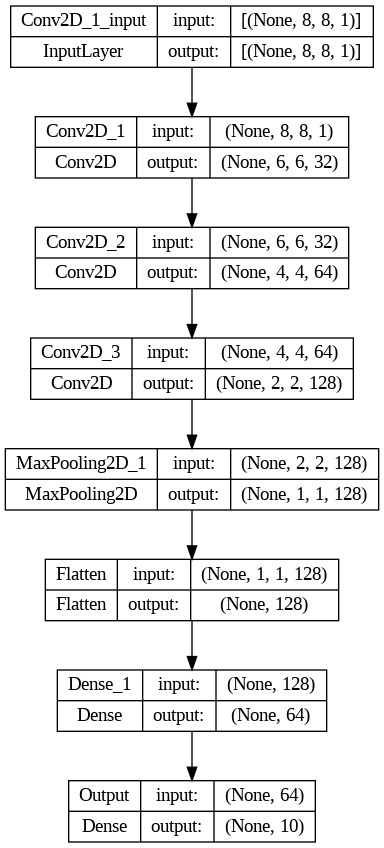

In [35]:
from keras.utils import plot_model

# Assuming your model is stored in the variable 'model'
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**5) Training Process**

In [36]:
#Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
57/57 [==============================] - 2s 18ms/step - loss: 1.2104 - accuracy: 0.6577 - val_loss: 0.3705 - val_accuracy: 0.8878
Epoch 2/50
57/57 [==============================] - 1s 26ms/step - loss: 0.2593 - accuracy: 0.9185 - val_loss: 0.1523 - val_accuracy: 0.9556
Epoch 3/50
57/57 [==============================] - 3s 52ms/step - loss: 0.1314 - accuracy: 0.9594 - val_loss: 0.0982 - val_accuracy: 0.9678
Epoch 4/50
57/57 [==============================] - 3s 50ms/step - loss: 0.1105 - accuracy: 0.9677 - val_loss: 0.0917 - val_accuracy: 0.9744
Epoch 5/50
57/57 [==============================] - 2s 28ms/step - loss: 0.0637 - accuracy: 0.9825 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 6/50
57/57 [==============================] - 2s 30ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0952 - val_accuracy: 0.9767
Epoch 7/50
57/57 [==============================] - 2s 27ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 8/50
57

- Model is trained for 50 epochs with a batch size of 64.
- Adam optimizer is used with sparse categorical crossentropy loss.
- Training and validation loss and accuracy are plotted to monitor training progress.

**3.1)** Max pooling is a downsampling operation commonly used in convolutional neural networks to reduce the spatial dimensions of the feature maps while retaining the most important information. It works by dividing the input feature map into non-overlapping rectangular regions and retaining only the maximum value from each region.

In [37]:
from tensorflow.keras.models import Model

# Define the model to output feature maps
layer_outputs = [model.layers[1].output,  # Output of the second convolutional layer (before pooling)
                 model.layers[2].output]  # Output of the max pooling layer (after pooling)

feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Use this model to predict on a sample input to get the feature maps
feature_maps = feature_map_model.predict(X_train[:1])  # Using the first image in the train set

# Feature maps before pooling
feature_maps_before_pooling = feature_maps[0]
# Feature maps after pooling
feature_maps_after_pooling = feature_maps[1]

1/1 [==============================] - 0s 73ms/step


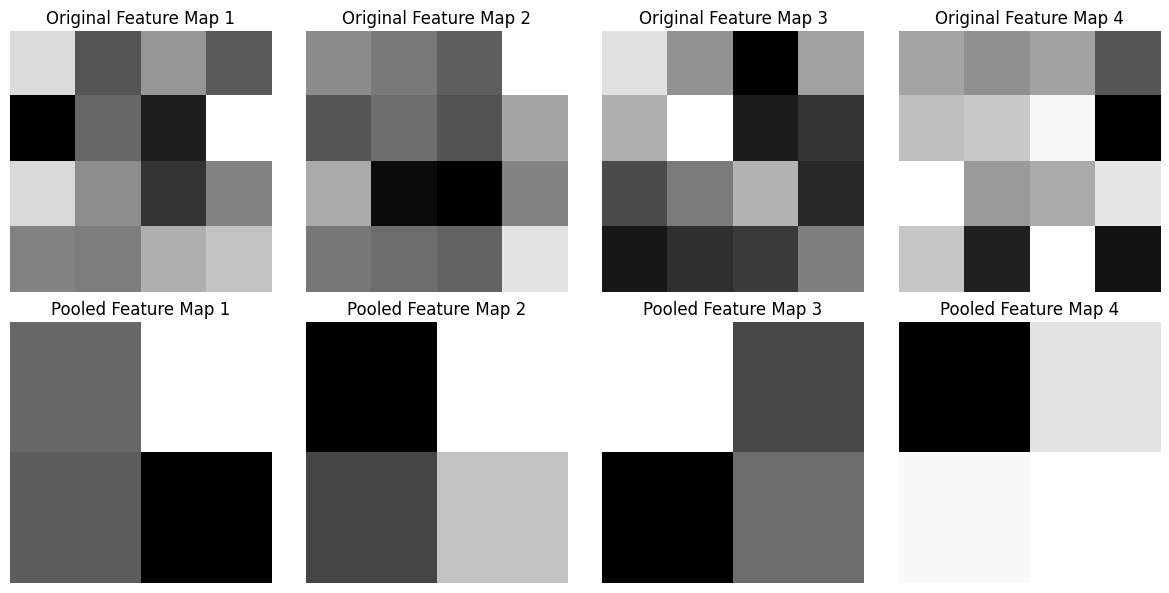

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming feature_maps_after_pooling is a 4D NumPy array representing feature maps after max pooling
# Shape of feature_maps_after_pooling: (batch_size, height, width, num_filters)
# Let's assume feature_maps_after_pooling.shape = (1, 4, 4, 64) for demonstration

# Create a random 4x4 feature map with 64 channels (for demonstration)
random_feature_map = np.random.rand(1, 4, 4, 64)

# Define a function to perform max pooling
def max_pooling(feature_map, pool_size=(2, 2)):
    batch_size, height, width, num_filters = feature_map.shape
    pooled_height = height // pool_size[0]
    pooled_width = width // pool_size[1]
    pooled_feature_map = np.zeros((batch_size, pooled_height, pooled_width, num_filters))
    for b in range(batch_size):
        for f in range(num_filters):
            for r in range(0, height, pool_size[0]):
                for c in range(0, width, pool_size[1]):
                    # Extract the region to perform max pooling
                    region = feature_map[b, r:r+pool_size[0], c:c+pool_size[1], f]
                    # Perform max pooling
                    pooled_feature_map[b, r//pool_size[0], c//pool_size[1], f] = np.max(region)
    return pooled_feature_map

# Perform max pooling on the random feature map
pooled_feature_map = max_pooling(random_feature_map)

# Visualize the original and pooled feature maps
num_filters_to_visualize = 4
fig, axes = plt.subplots(2, num_filters_to_visualize, figsize=(12, 6))
for i in range(num_filters_to_visualize):
    # Original feature map
    axes[0, i].imshow(random_feature_map[0, :, :, i], cmap='gray')
    axes[0, i].set_title(f'Original Feature Map {i+1}')
    axes[0, i].axis('off')
    # Pooled feature map
    axes[1, i].imshow(pooled_feature_map[0, :, :, i], cmap='gray')
    axes[1, i].set_title(f'Pooled Feature Map {i+1}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()


3.2) Effect of Maxpooling with feature maps

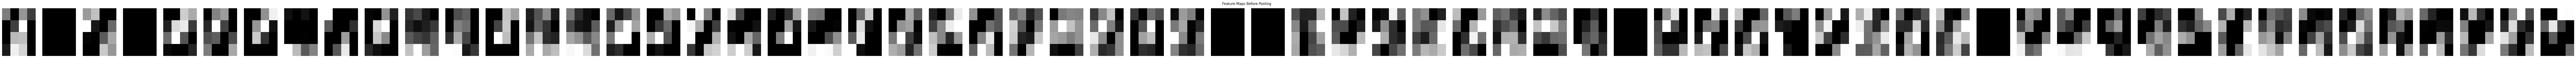

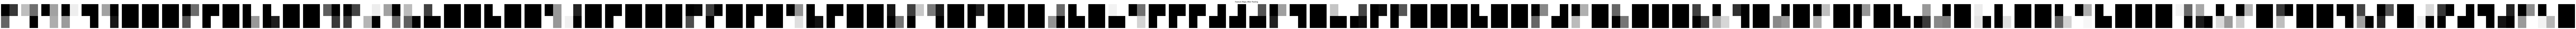

In [38]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, title):
    num_maps = feature_maps.shape[-1]  # Get the number of feature maps
    fig, axes = plt.subplots(1, num_maps, figsize=(num_maps * 2.5, 3))  # Dynamic sizing of the plot
    fig.suptitle(title)

    if num_maps == 1:  # If there is only one feature map, axes is not an array
        axes = [axes]

    for i, ax in enumerate(axes):
        # Displaying the i-th feature map
        ax.imshow(feature_maps[:, :, :, i].squeeze(), cmap='gray', aspect='auto')
        ax.axis('off')
    plt.show()

# Now using the function to plot the feature maps
# Plot feature maps before and after pooling
plot_feature_maps(feature_maps_before_pooling, "Feature Maps Before Pooling")
plot_feature_maps(feature_maps_after_pooling, "Feature Maps After Pooling")


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce dimension to 4x4
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Using padding to maintain dimension
    Flatten(),  # Flattening the outputs from the convolutional layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with softmax activation for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          320       
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                      

***5.4) K-Fold ***

In [46]:
from sklearn.model_selection import KFold
import numpy as np

# Parameters
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)


# K-fold Cross Validation model evaluation
fold_no = 1
accuracies = []
losses = []

for train_idx, test_idx in kfold.split(X_train, y_train):
    X_train_fold = X_train[train_idx].reshape(-1, 8, 8, 1)
    X_test_fold = X_train[test_idx].reshape(-1, 8, 8, 1)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training for fold {fold_no}...')
    history = model.fit(X_train_fold, y_train.iloc[train_idx],
                        batch_size=32, epochs=10, validation_data=(X_test_fold, y_train.iloc[test_idx]))

    # Saving scores
    scores = model.evaluate(X_test_fold, y_train.iloc[test_idx], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    accuracies.append(scores[1])
    losses.append(scores[0])

    fold_no += 1


# Average results
print('Average Accuracy:', np.mean(accuracies))
print('Average Loss:', np.mean(losses))




Training for fold 1...
Epoch 1/10
113/113 [==============================] - 7s 27ms/step - loss: 0.9230 - accuracy: 0.7008 - val_loss: 0.2065 - val_accuracy: 0.9356
Epoch 2/10
113/113 [==============================] - 2s 21ms/step - loss: 0.2295 - accuracy: 0.9313 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 3/10
113/113 [==============================] - 2s 19ms/step - loss: 0.1335 - accuracy: 0.9588 - val_loss: 0.1221 - val_accuracy: 0.9633
Epoch 4/10
113/113 [==============================] - 3s 28ms/step - loss: 0.0987 - accuracy: 0.9722 - val_loss: 0.0789 - val_accuracy: 0.9744
Epoch 5/10
113/113 [==============================] - 2s 20ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.0788 - val_accuracy: 0.9744
Epoch 6/10
113/113 [==============================] - 2s 19ms/step - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 7/10
113/113 [==============================] - 2s 21ms/step - loss: 0.0452 - accuracy: 0.9880 - val_loss: 0.0632

**5.2) Evaluation**

In [47]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

36/36 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 0.9911
Test Loss: 0.032877642661333084
Test Accuracy: 0.9911032319068909


- Model is evaluated on the test set.
- Test loss and accuracy are reported.

5.4) confusion matrix

In [48]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

36/36 [==============================] - 0s 6ms/step
Confusion Matrix:
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  1   0 106   0   0   0   0   0   0   0]
 [  0   0   0 116   0   1   0   0   1   0]
 [  0   0   0   0 115   0   1   0   0   1]
 [  0   0   0   0   0  95   0   0   0   2]
 [  0   2   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 123   0   1]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   0   0   0   0   0   0 123]]


5.3) Document the training process, including loss curves and accuracy metrics.

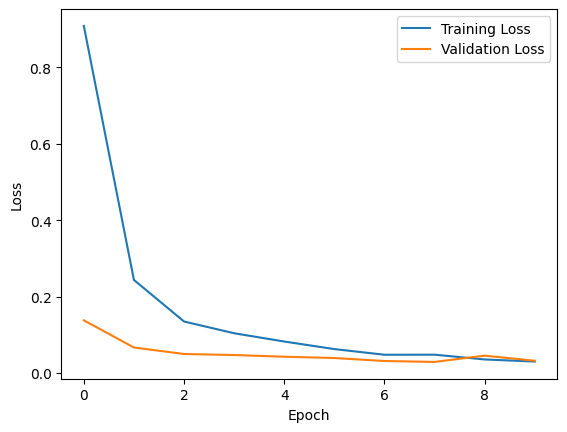

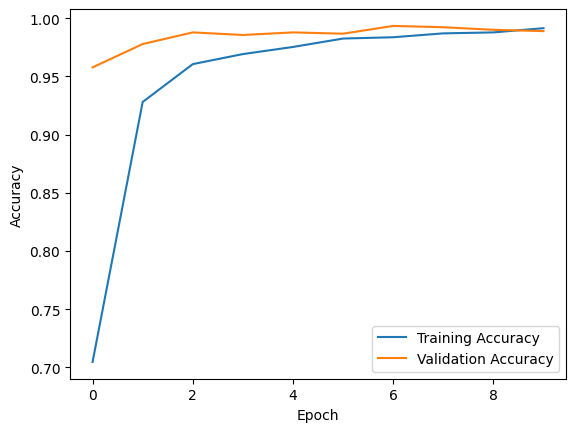

In [49]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The training process involved constructing a Convolutional Neural Network (CNN) architecture for handwritten digit recognition using the MNIST dataset. Here's a summary of the key steps and outcomes:

**Data Preparation:** The MNIST dataset was preprocessed, including normalization of pixel values and reshaping the data to fit the CNN architecture.

**CNN Architecture Design:** The CNN architecture comprised convolutional layers followed by max-pooling layers to extract features from the input images. This was followed by fully connected layers for classification.

**Training Process:**The model was trained using the training data, with a focus on monitoring loss and accuracy metrics over multiple epochs. The Adam optimizer was used with sparse categorical crossentropy loss.

**Model Evaluation:** The trained model was evaluated on the test dataset, reporting test loss and accuracy metrics. Additionally, a confusion matrix was generated to analyze classification performance across different classes.

**K-Fold Cross Validation:** The model was further evaluated using K-Fold Cross Validation to ensure robustness and assess generalization performance.

**Visualization:** Feature maps before and after max-pooling were visualized to understand how the CNN architecture learns hierarchical representations of input images.

**Analysis:** The training history, including loss curves and accuracy metrics, was documented and analyzed to understand the model's learning dynamics.

**Conclusion:**
Overall, the CNN model demonstrated effective learning and generalization capabilities for handwritten digit recognition. The training and validation loss curves converged, indicating successful optimization, while the accuracy metrics on the test set demonstrated the model's ability to generalize to unseen data. Furthermore, the confusion matrix provided insights into the model's performance across different digit classes, highlighting areas for potential improvement. Through this project, practical experience in CNN implementation, training, evaluation, and analysis for image classification tasks was gained, contributing to a deeper understanding of deep learning techniques in computer vision applications.